# Boston House Pricing dataset from sklearn

## Loading data into pandas dataframe

First we extract a list of descriptions out of the data set to understand what we are actually looking at

* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per \$10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population
* MEDV     Median value of owner-occupied homes in $1000's

In [156]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset["data"])
df.columns = boston_dataset["feature_names"]

df["MEDV"] = boston_dataset["target"]

print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [152]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [155]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are no missing values so we don't have tink about using an Imputer to fix this situation.

Before further analyzing the dataset we split it 80/20 in train and test dataset so we are not biased when making design decisions

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2)


In [158]:
y_train
# continous so we use Regressor

86     22.5
108    19.8
330    19.8
219    23.0
84     23.9
       ... 
245    18.5
139    17.8
432    16.1
478    14.6
155    15.6
Name: MEDV, Length: 404, dtype: float64

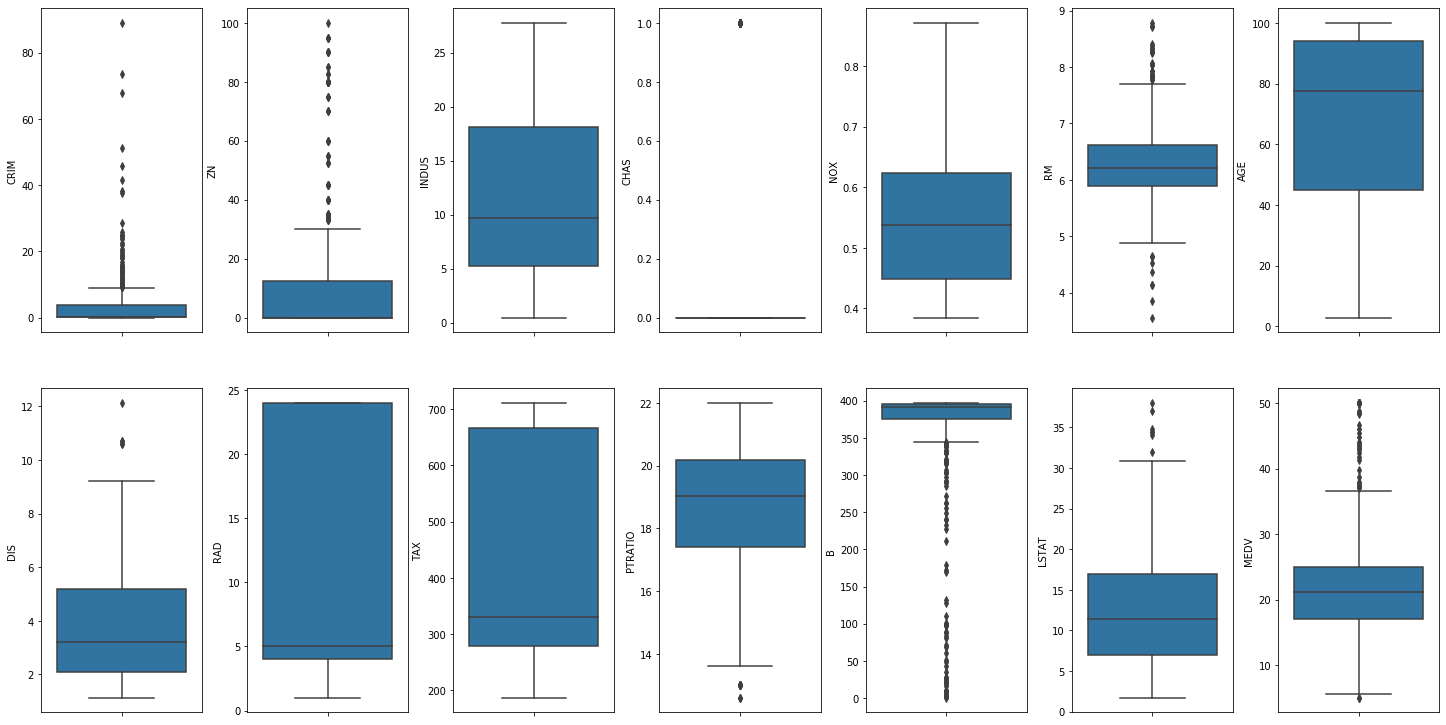

In [159]:
#boxplots to spot outlier
df.columns

f,a = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
a = a.reshape(a.shape[0] * a.shape[1],1).ravel()
#a = a.flatten()
i=0
for c in df.columns: 
    sns.boxplot(y=df[c],data=df,ax=a[i])
    i += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)





In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error






In [176]:
# Try Random Forest Regressor

In [182]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

rf_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("rf", RandomForestRegressor())
])


rf_pipe.fit(X_train,y_train.values)
predicted = rf_pipe.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print("R2-Score Random Forest Baseline, against test set", mae)

parameters = {
    "rf__n_estimators": [4,8,16,32,64],
    "rf__max_depth": [50,100,150,None]
}

gscv = GridSearchCV(rf_pipe, parameters, n_jobs = 4, verbose=1, cv=5, scoring='neg_mean_absolute_error')
grid_result = gscv.fit(X_train, y_train)
print("Best Score ", grid_result.best_score_)
print("Best Params ", grid_result.best_params_)

rf_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("rf", RandomForestRegressor(max_depth=100, n_estimators=64))
])


cross_val_scores = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("Baseline Cross Validation", cross_val_scores, np.mean(cross_val_scores) )


R2-Score Random Forest Baseline, against test set 2.3524607843137253
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


Best Score  -2.229881847993827
Best Params  {'rf__max_depth': None, 'rf__n_estimators': 32}
Baseline Cross Validation [-2.19002701 -2.44562114 -2.26849923 -2.1337963  -2.50007813] -2.307604359567901


In [212]:
rf_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("rf", RandomForestRegressor(max_depth=100, n_estimators=64))
])

rf_pipe.fit(X_train, y_train)

importance = rf_pipe[1].feature_importances_

df_importance = pd.DataFrame.from_dict({
    "importance": importance,
    "feature_names": df.columns[:-1]
}).sort_values(["importance"], ascending=False)

df_importance["cumsum"] =  df_importance["importance"].cumsum()
df_importance

# try SCR

,importance,feature_names,cumsum
5,0.500229,RM,0.500229
12,0.331128,LSTAT,0.831357
7,0.041800,DIS,0.873157
4,0.028064,NOX,0.901221
0,0.027492,CRIM,0.928713
6,0.017710,AGE,0.946423
10,0.017103,PTRATIO,0.963526
9,0.014200,TAX,0.977726
11,0.010233,B,0.987960
2,0.007299,INDUS,0.995259


In [185]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

svm_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("svm", SVR())
])


svm_pipe.fit(X_train,y_train.values)
predicted = svm_pipe.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print("R2-Score SVR Baseline, against test set", mae)

parameters = {
    "svm__C": [0.01, 0.1, 1, 10, 100],
    "svm__kernel": ["linear","rbf"]
}

gscv = GridSearchCV(svm_pipe, parameters, n_jobs = 4, verbose=1, cv=5, scoring='neg_mean_absolute_error')
grid_result = gscv.fit(X_train, y_train)
print("Best Score ", grid_result.best_score_)
print("Best Params ", grid_result.best_params_)

svm_pipe = Pipeline([
    ("dataprep", StandardScaler()),
    ("svm", SVR(C=100, kernel="rbf"))
])


cross_val_scores = cross_val_score(svm_pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("Baseline Cross Validation", cross_val_scores, np.mean(cross_val_scores) )


R2-Score SVR Baseline, against test set 3.253296821483144
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    1.1s finished


Best Score  -2.3821505551727773
Best Params  {'svm__C': 100, 'svm__kernel': 'rbf'}
Baseline Cross Validation [-2.06036886 -2.3395864  -2.47654675 -2.10780628 -2.92644449] -2.3821505551727773


In [ ]:
# try  XGBOOST

In [186]:
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ("dataprep",StandardScaler()),
    ("xgb", XGBRegressor())
])

xgb_pipe.fit(X_train,y_train.values)

predicted = xgb_pipe.predict(X_test)
mae = mean_absolute_error(y_test, predicted)
print("mae SVR Baseline, against test set", mae)


parameters = {
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__gamma': [0.5, 1, 1.5, 2, 5],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__max_depth': [3, 4, 5]
}

gscv = GridSearchCV(xgb_pipe, parameters, n_jobs = 4, verbose=1, cv=KFold(5), scoring='neg_mean_absolute_error')
grid_result = gscv.fit(X_train, y_train)
print("Best Score ", grid_result.best_score_)
print("Best Params ", grid_result.best_params_)

xgb_pipe = Pipeline([
    ("dataprep",StandardScaler()),
    ("xgb", XGBRegressor(colsample_bytree=1, gamma=2, max_depth=4, min_child_weight=1, subsample=1))
])

cross_val_scores = cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("Baseline Cross Validation", cross_val_scores, np.mean(cross_val_scores) )

mae SVR Baseline, against test set 2.211502285564647
Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 1728 tasks      | elapsed:   34.3s
[Parallel(n_jobs=4)]: Done 2025 out of 2025 | elapsed:   43.1s finished


Best Score  -2.117929404579563
Best Params  {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 2, 'xgb__max_depth': 3, 'xgb__min_child_weight': 5, 'xgb__subsample': 1.0}
Baseline Cross Validation [-1.98907345 -2.36578785 -2.18791178 -1.87589998 -2.27042772] -2.1378201588789625


In [187]:
# FNN

In [254]:
from tensorflow import keras
from keras.layers import Dense, Input, Dropout
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#model.add(Input(shape=(X_train.shape[0],)))
model.add(Dense(50, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(20, activation="relu"))
model.add(Dropout(.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mae")

#scale X 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df)

X_scaled = df_scaled[:,:-1]
y_scaled = df_scaled[:,-1]

df_scaled.shape
X_scaled.shape

callback = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=1)

history = model.fit(X_scaled, y_scaled, batch_size=1, epochs=40,verbose=True, validation_split=0.2, callbacks=[callback])



Train on 404 samples, validate on 102 samples
Epoch 1/40
404/404 [==============================] - 0s 1ms/step - loss: 0.1366 - val_loss: 0.0651
Epoch 2/40
404/404 [==============================] - 0s 799us/step - loss: 0.1024 - val_loss: 0.0738
Epoch 3/40
404/404 [==============================] - 0s 931us/step - loss: 0.0928 - val_loss: 0.0633
Epoch 4/40
404/404 [==============================] - 0s 839us/step - loss: 0.0848 - val_loss: 0.0657
Epoch 5/40
404/404 [==============================] - 0s 784us/step - loss: 0.0769 - val_loss: 0.0669
Epoch 6/40
404/404 [==============================] - 0s 779us/step - loss: 0.0821 - val_loss: 0.0626
Epoch 7/40
404/404 [==============================] - 0s 783us/step - loss: 0.0725 - val_loss: 0.0624
Epoch 8/40
404/404 [==============================] - 0s 797us/step - loss: 0.0724 - val_loss: 0.0619
Epoch 9/40
404/404 [==============================] - 0s 786us/step - loss: 0.0760 - val_loss: 0.0615
Epoch 10/40
404/404 [=================

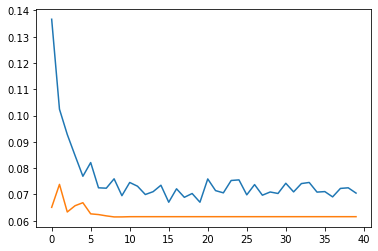

In [262]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [253]:
predictions = model.predict(scaler.transform(X_test)[:,:-1])

X_test["dummy"] = predictions

real_pred = scaler.inverse_transform(X_test)[:,-1]

mean_absolute_error(y_test,real_pred)


2.7463386618185273